In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config

In [9]:
file_path = '../output/state/'
files = sorted(os.listdir(file_path))
print(files)


['critical_prob=0.0&num_states=1&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.0&num_states=10&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.0&num_states=15&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.0&num_states=3&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.0&num_states=5&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.0&num_states=7&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=1&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=10&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=15&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=3&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=5&num_tasks=15&period=[10, 100]&tas

In [10]:
cfg = get_config('../cfg/state_exp_cfg.json')
state_less = {}
state_wise = {}

critical_prob_list = cfg['critical_prob_list']

for state_num in cfg['num_states_list'] :
    state_less[str(state_num)] = [ 0 ] * len(critical_prob_list)
    state_wise[str(state_num)] = [ 0 ] * len(critical_prob_list)

In [11]:
critical_prob_index = {str(p): i for i, p in enumerate(critical_prob_list)}

for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    data = get_file_data(file_path + file).split('\n')
    num_states = params['num_states']
    critical_prob = params['critical_prob']

    for line in data :
        if line == '' :
            continue
        less, wise = [int(l) for l in line.split(',')]
        state_less[num_states][critical_prob_index[critical_prob]] += less
        state_wise[num_states][critical_prob_index[critical_prob]] += wise

In [12]:
num_task_sets = cfg['num_task_sets']

for k, v in state_less.items() :
    state_less[k] = [l / num_task_sets for l in v]

for k, v in state_wise.items() :
    state_wise[k] = [l / num_task_sets for l in v]

print(state_less)
print(state_wise)

{'1': [3.933333333333333, 4.2, 4.733333333333333, 4.733333333333333, 5.533333333333333, 5.8, 5.666666666666667, 6.0, 6.666666666666667, 7.533333333333333, 7.933333333333334], '3': [4.066666666666666, 4.466666666666667, 6.133333333333334, 5.866666666666666, 7.333333333333333, 8.066666666666666, 7.6, 8.133333333333333, 7.4, 8.0, 8.6], '5': [4.0, 5.266666666666667, 6.266666666666667, 7.666666666666667, 7.4, 8.866666666666667, 8.666666666666666, 8.0, 7.933333333333334, 8.666666666666666, 8.666666666666666], '7': [4.066666666666666, 5.066666666666666, 6.8, 7.0, 8.333333333333334, 7.933333333333334, 7.666666666666667, 8.4, 8.333333333333334, 8.6, 8.533333333333333], '10': [3.8, 6.266666666666667, 7.733333333333333, 7.4, 7.733333333333333, 8.0, 8.4, 7.133333333333334, 8.8, 8.8, 8.6], '15': [4.066666666666666, 7.2, 7.8, 8.533333333333333, 8.8, 8.733333333333333, 7.733333333333333, 8.466666666666667, 7.733333333333333, 7.733333333333333, 8.4]}
{'1': [3.933333333333333, 4.2, 4.733333333333333, 4

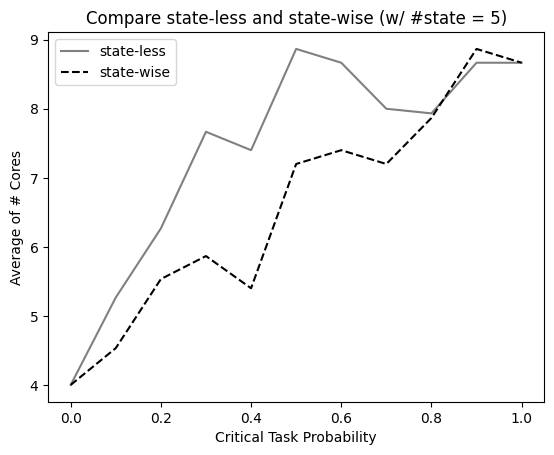

In [13]:
# Compare state-wise and state-less with criticality probability (#state = 5)

plt.plot(critical_prob_list, state_less['5'], label='state-less', color='gray')
plt.plot(critical_prob_list, state_wise['5'], label='state-wise', color='black', linestyle='dashed')

plt.title('Compare state-less and state-wise (w/ #state = 5)')
plt.xlabel('Critical Task Probability')
plt.ylabel('Average of # Cores')
plt.legend()
plt.show()

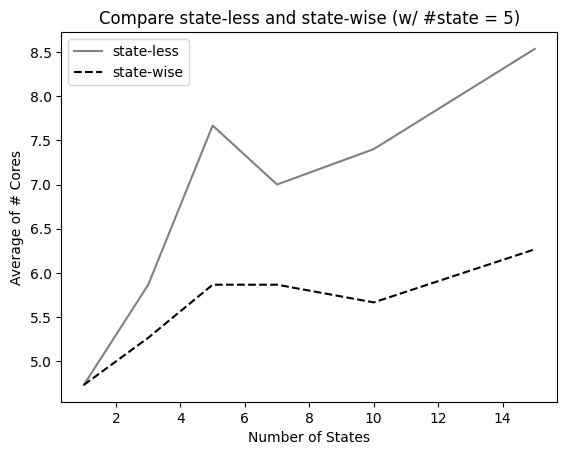

In [14]:
# Compare state-wise and state-less with #states (#critical_prob = 0.3)

index = critical_prob_index['0.3']
state_list = cfg['num_states_list']

def get_state_list(output_dict, index) :
    return [output_dict[str(s)][index] for s in state_list]

plt.plot(state_list, get_state_list(state_less, index), label='state-less', color='gray')
plt.plot(state_list, get_state_list(state_wise, index), label='state-wise', color='black', linestyle='dashed')

plt.title('Compare state-less and state-wise (w/ #state = 5)')
plt.xlabel('Number of States')
plt.ylabel('Average of # Cores')
plt.legend()
plt.show()